<a href="https://colab.research.google.com/github/DGsantos14/-dgsantos.github.io/blob/master/Trabalho_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Barras agrupadas e barras empilhadas

  Ao analisar dados em ciências sociais é muito comum ver gráficos de barras um pocuo mais complicados:

*barras agrupadas: cada categoria possui mais de uma barra, lado a lado

*barras empilhadas: cada categoria possui apenas uma barra, mas ela é dividida em mais de um setor (dividida em cores).

  É muito fácil construi-las usando matplotlib e pandas. No entanto, os seus dados devem estar na forma correta.

Para as barras agrupadas:

  é preciso haver mais uma coluna para cada elemento (e os valores devem estar na mesma escala).

Para as barras empilhadas, além da regra acima:

  é preciso que cada coluna represente partes ou porcentagens de alguma coisa maior.

  Por exemplo, renda de cada um dos moradores da casa, porcentagens de homens e mulheres na sala e participação de cada um dos setores na economia de um país.

Neste notebook vamos analisar a distribuição da renda total dos municípios brasileiros em 2010 em três categorias:

*ricos: os 10% mais ricos, o décimo decil.

*pobres: os 40% mais pobres, os decis de 1 a 4.

*classe média (cm): as pessoas que estão nos decis 5 a 9 da distribuição de renda.

  Essas divisões são importantes porque há estudos que identificaram que a classe média normalmente fica com algo próximo de 50% do total da renda na maior dos países, enquanto que a parcela em posse dos ricos e dos pobres varia bastante. Sugerindo que pode existir algum tipo de transferência da renda dos pobres para os ricos.

  Nossa intenção é verificar se esse fenômeno que vale para os diferentes países também vale para os diferentes municípios brasileiros.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

In [0]:
atlas = pd.read_csv('https://raw.githubusercontent.com/lincolnfrias/dados/master/atlas.csv')

atlas = atlas[['nome_mun', 'pren10ricos', 'pren40']]        # recorta os dados, deixando apenas três variáveis
atlas['cm'] = 100 - (atlas.pren10ricos + atlas.pren40)      # cria a variável relativa à classe média
atlas.index = atlas.nome_mun                                # transforma os municípios em índice 
atlas.drop('nome_mun', axis=1, inplace=True)                # apaga a variável com o nome dos municípios
                                                            # importante para não atrapalhar a cosntrução dos gráficos

atlas.columns = ['ricos', 'pobres', 'cm']                   # renomeia as colunas 

In [0]:
atlas.head()

,ricos,pobres,cm
nome_mun,,,
Alta Floresta D'Oeste,44.81,8.27,46.92
Ariquemes,44.01,11.33,44.66
Cabixi,37.86,11.37,50.77
Cacoal,47.47,10.12,42.41
Cerejeiras,39.22,11.82,48.96


Primeiro

In [0]:
atlas10 = atlas[:10]


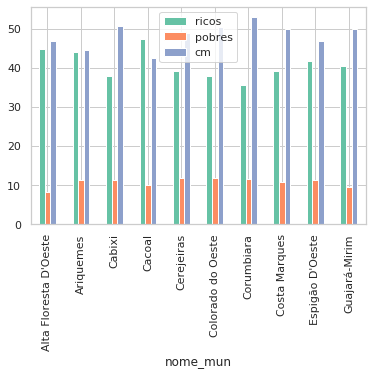

In [0]:
atlas10.plot.bar();

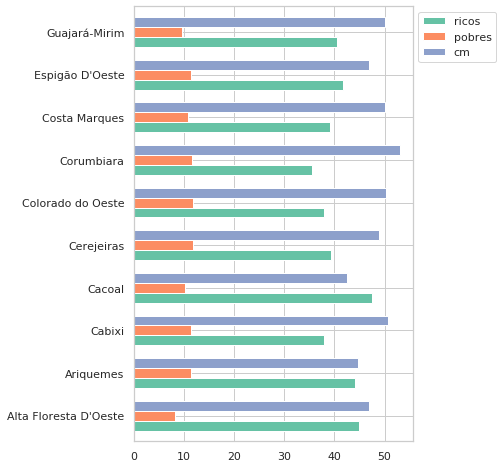

In [0]:
atlas10.plot.barh(width=.7, figsize=(5, 8))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('');

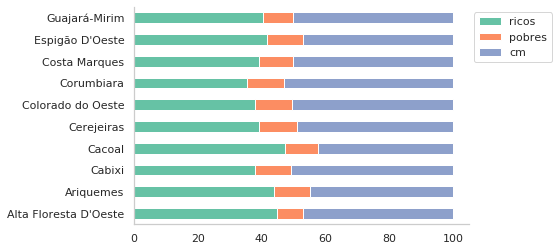

In [0]:
atlas10.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(False)
sns.despine()
plt.ylabel('');

**Usando o todos os municípios**

Agora podemos usar o que aprendemos para investigar se a disputa pela renda realmente se concentra entre e ricos e pobres, enquanto que a classe média se mantém com 50% da renda.


In [0]:
atlas = atlas.loc[:, ['cm', 'pobres', 'ricos']].sort_values(by='cm')# ordena as colunas e os dados
                                                                    # decisivo para o gráfico

(-0.75, 5564.75, 0.0, 105.00000000000003)

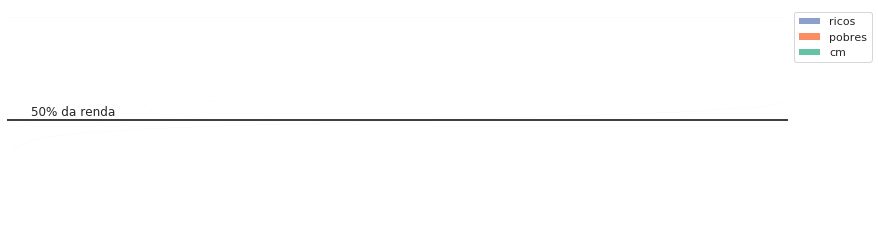

In [0]:
# demora mais de 30 segundos
ax = atlas.plot.bar(stacked=True, figsize=(14, 4), width=1)

# comandos para ajustar a ordem da legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1), handles=reversed(handles), labels=reversed(labels), loc='upper left')

# cria linha horizontal marcando 50% da renda 
plt.axhline(50, color='black')
plt.annotate('50% da renda', xycoords='axes fraction', xy=(.03, .5))

# para não mostrar os eixos
plt.axis('off')

É possível reordenar os dados de acordo com a renda dos ricos incluindo o comando de ordenação no comando para gerar o gráfico:

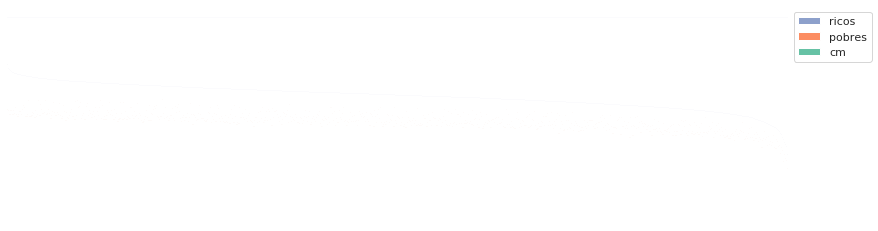

In [0]:
# demora mais de 30 segundos
ax = (atlas
         .loc[:, ['cm', 'pobres', 'ricos']]
         .sort_values(by='ricos')
         .plot.bar(stacked=True, figsize=(14, 4), width=1))

# comandos para ajustar a ordem da legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1), handles=reversed(handles), labels=reversed(labels), loc='upper left') 

# para não mostrar os eixos
plt.axis('off');

Como se pode ver no primeiro gráfico, a hipótese se confirmou.

Isso fica ainda mais claro quando vemos o resumo estatístico e os boxplots (para fazer os boxplots é preciso transformar os dados em formato longo, usando comando .melt()).

A variação na renda dos ricos é muito maior do que a das outras categorias.
A mediana da classe média é praticamente 50% (49,97) e seus primeiro e terceiro quartis também estão muito próximos desse valor (47,16 e 56,62).

In [0]:
atlas.describe()

,cm,pobres,ricos
count,5565.000000,5565.000000,5565.000000
mean,49.682226,12.115003,38.202771
std,4.494959,3.258769,5.918593
min,18.950000,0.000000,22.260000
25%,47.160000,9.920000,34.170000
50%,49.970000,12.170000,37.620000
75%,52.620000,14.450000,41.630000
max,62.030000,22.500000,75.340000


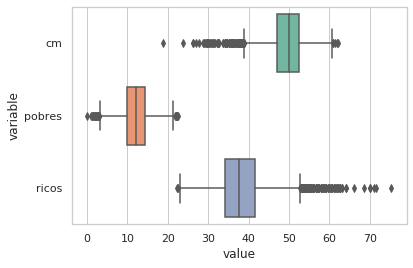

In [0]:
sns.boxplot('value', 'variable', data=atlas.melt());

Porém, a correlação entre ricos e classse média é maior do que entre ricos e pobres, o que não seria de se esperar se nossa hipótese fosse verdadeira

In [0]:
atlas.corr()

,cm,pobres,ricos
cm,1.000000,0.143552,-0.838504
pobres,0.143552,1.000000,-0.659621
ricos,-0.838504,-0.659621,1.000000


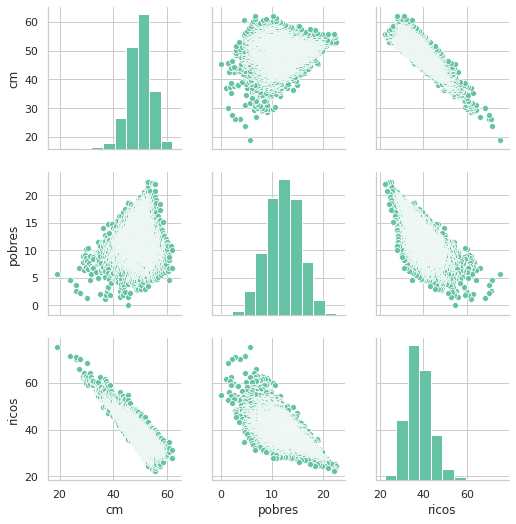

In [0]:
sns.pairplot(atlas);